# import python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

# helper functions (if necessary)

In [93]:
#python code...

# read in training data 

In [2]:
train_df = pd.read_csv('train.tsv', delimiter='\t')
print(train_df)

       STG   SCG   STR   LPR   PEG       UNS
0    0.570  0.37  0.75  0.27  0.32       Low
1    0.160  0.16  0.80  0.50  0.50    Middle
2    0.245  0.26  0.38  0.49  0.27       Low
3    0.295  0.59  0.29  0.31  0.55    Middle
4    0.523  0.41  0.55  0.60  0.22       Low
..     ...   ...   ...   ...   ...       ...
317  0.280  0.16  0.69  0.33  0.78      High
318  0.000  0.62  0.52  0.26  0.07  Very_Low
319  0.280  0.65  0.40  0.65  0.13       Low
320  0.210  0.88  0.87  0.56  0.95      High
321  0.200  0.52  0.36  0.84  0.25    Middle

[322 rows x 6 columns]


# visualize data

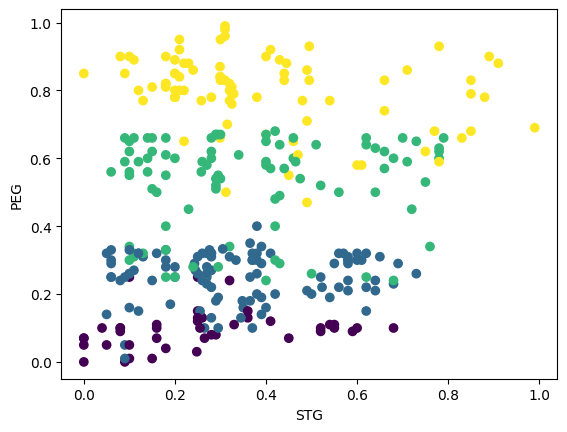

In [3]:
color_map = {'Very_Low': 0, 'Low': 1, 'Middle': 2, 'High': 3}
train_df['UNS_numeric'] = train_df['UNS'].map(color_map)
plt.scatter(train_df['STG'], train_df['PEG'], c=train_df['UNS_numeric'])
plt.xlabel('STG')
plt.ylabel('PEG')
plt.show()

# experiment with building classification models

In [4]:
X = train_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
y = train_df['UNS']

target_dict = {'Very_Low': 0, 'Low': 1, 'Middle': 2, 'High': 3}
y = y.replace(target_dict)
y = y.astype('int')

for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')

    print(f'K = {k}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}')

K = 1: Accuracy = 0.839, Precision = 0.840, Recall = 0.839
K = 2: Accuracy = 0.817, Precision = 0.830, Recall = 0.817
K = 3: Accuracy = 0.845, Precision = 0.850, Recall = 0.845
K = 4: Accuracy = 0.851, Precision = 0.855, Recall = 0.851
K = 5: Accuracy = 0.854, Precision = 0.861, Recall = 0.854
K = 6: Accuracy = 0.860, Precision = 0.870, Recall = 0.860
K = 7: Accuracy = 0.835, Precision = 0.847, Recall = 0.835
K = 8: Accuracy = 0.848, Precision = 0.859, Recall = 0.848
K = 9: Accuracy = 0.863, Precision = 0.880, Recall = 0.863
K = 10: Accuracy = 0.860, Precision = 0.875, Recall = 0.860
K = 11: Accuracy = 0.839, Precision = 0.863, Recall = 0.839


# visualize experimental results (accuracy, precision, recall)

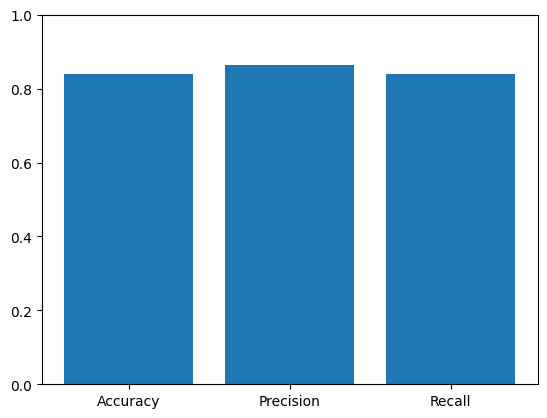

In [5]:
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

plt.bar(metrics, scores)
plt.ylim((0,1))
plt.show()

# Question: What features and classifier parameters work "best"?

For the best results you are going to be looking at k 9. As seen above you get best accuracy of both worlds. both recall and precision is at its peak. while others display some great numbers you are going to be lacking on other numbers.

# create "best" classification model on training data

In [6]:
X_train = train_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
y_train = train_df['UNS']

target_dict = {'Very_Low': 0, 'Low': 1, 'Middle': 2, 'High': 3}
y_train = y_train.replace(target_dict)
y_train = y_train.astype('int')

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

# read in test data

In [7]:
test_df = pd.read_csv('test.tsv', sep='\t')

X_test = test_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]

print(test_df)

      STG   SCG   STR   LPR   PEG
0   0.510  0.40  0.40  0.59  0.23
1   0.170  0.36  0.80  0.14  0.66
2   0.780  0.21  0.68  0.65  0.75
3   0.600  0.14  0.22  0.11  0.66
4   0.410  0.09  0.58  0.18  0.58
..    ...   ...   ...   ...   ...
76  0.440  0.32  0.55  0.33  0.52
77  0.445  0.70  0.82  0.16  0.64
78  0.115  0.35  0.65  0.27  0.04
79  0.275  0.10  0.72  0.10  0.30
80  0.285  0.64  0.18  0.61  0.45

[81 rows x 5 columns]


# use model to make predictions of test data 

In [8]:
y_pred = knn.predict(X_test)

target_dict = {0: 'Very_Low', 1: 'Low', 2: 'Middle', 3: 'High'}
y_pred_str = pd.Series(y_pred).replace(target_dict)

# visualize test data with predicted labels

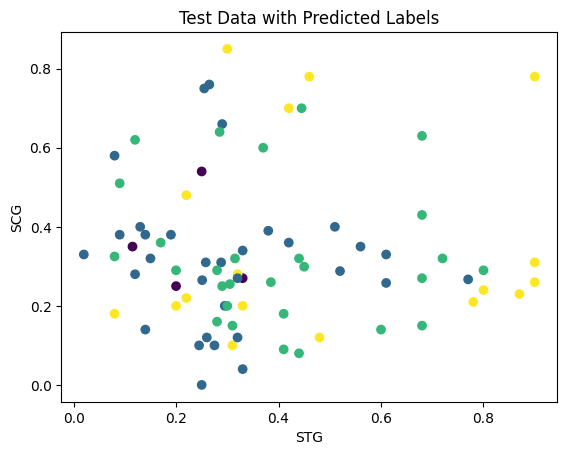

In [9]:
fig3, ax3 = plt.subplots()
ax3.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred)
ax3.set_xlabel('STG')
ax3.set_ylabel('SCG')
ax3.set_title('Test Data with Predicted Labels')
plt.show()

# write test data and predictions to \<YourLastName>.tsv

In [10]:
X_test = test_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]

y_test_pred = knn.predict(X_test)

test_pred_df = pd.DataFrame({'STG': X_test['STG'], 'SCG': X_test['SCG'], 'STR': X_test['STR'], 'LPR': X_test['LPR'], 'PEG': X_test['PEG'], 'UNS': y_test_pred})

target_dict = {0: 'Very_Low', 1: 'Low', 2: 'Middle', 3: 'High'}
test_pred_df = test_pred_df.replace({'UNS': target_dict})

test_pred_df.to_csv('Rakowicz.tsv', sep='\t', header=True, index=False)